In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('StudentsPerformance.csv')

# Check if the dataset contains any placeholder values
print("\nChecking for placeholder values:")
placeholders = ['?', 'N/A', 'NA', 'None', '']

for placeholder in placeholders:
    print(f"Number of '{placeholder}' entries in each column:")
    print((df == placeholder).sum())


Checking for placeholder values:
Number of '?' entries in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Number of 'N/A' entries in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Number of 'NA' entries in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Number of 'None' e

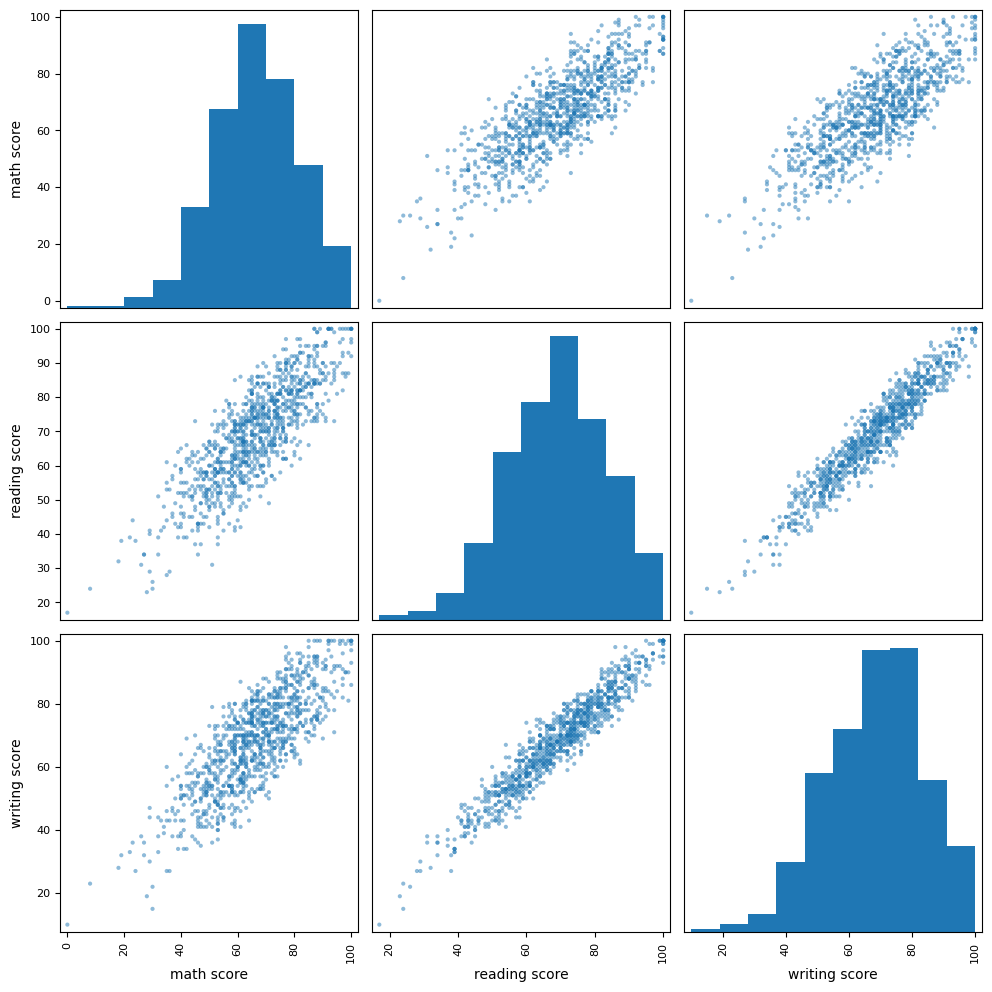

In [32]:
pd.plotting.scatter_matrix(df, figsize=(10,10));
plt.tight_layout(pad=1.0) 

In [33]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset to avoid modifying the original dataframe
df_encoded = df.copy()

# Use pd.get_dummies() to one-hot encode the categorical columns
# drop_first = True automatically removes one of the two columns and avoids redundancy, since the categories are mutually exclusive.
df_encoded = pd.get_dummies(df, columns=['gender','lunch', 'test preparation course'], drop_first=True)

# The following features have more than two possible values, therefore, they are not mutually exclusive.
df_encoded = pd.get_dummies(df_encoded, columns=['race/ethnicity','parental level of education'])
df_encoded = df_encoded.astype(int)

In [34]:
# Create a min max scaler and scale all the features of the dataset. In this case between 0 and 1
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch

scaler = MinMaxScaler()
df_encoded_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Separate the input and the output features, output is Math Score.
X, y = df_encoded_scaled.drop("math score", axis=1), df_encoded_scaled["math score"]
# Convert DataFrame to NumPy arrays
X_np = X.values
y_np = y.values

# Convert NumPy arrays to PyTorch tensors
X_tensor = torch.tensor(X_np, dtype=torch.float32)
y_tensor = torch.tensor(y_np, dtype=torch.float32)
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [35]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset to avoid modifying the original dataframe
df_encoded = df.copy()

# Use pd.get_dummies() to one-hot encode the categorical columns
# drop_first = True automatically removes one of the two columns and avoids redundancy, since the categories are mutually exclusive.
df_encoded = pd.get_dummies(df, columns=['gender','lunch', 'test preparation course'], drop_first=True)

# The following features have more than two possible values, therefore, they are not mutually exclusive.
df_encoded = pd.get_dummies(df_encoded, columns=['race/ethnicity','parental level of education'])
df_encoded = df_encoded.astype(int)

In [36]:

from torch.utils.data import Dataset, DataLoader
class MyDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

/opt/anaconda3/envs/mas/lib/python3.12/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/anaconda3/envs/mas/lib/python3.12/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/50 => Train Loss: 0.1371, Val Loss: 0.0403
Epoch 2/50 => Train Loss: 0.0329, Val Loss: 0.0296
Epoch 3/50 => Train Loss: 0.0268, Val Loss: 0.0259
Epoch 4/50 => Train Loss: 0.0250, Val Loss: 0.0249
Epoch 5/50 => Train Loss: 0.0243, Val Loss: 0.0241
Epoch 6/50 => Train Loss: 0.0238, Val Loss: 0.0238
Epoch 7/50 => Train Loss: 0.0234, Val Loss: 0.0235
Epoch 8/50 => Train Loss: 0.0233, Val Loss: 0.0234
Epoch 9/50 => Train Loss: 0.0233, Val Loss: 0.0232
Epoch 10/50 => Train Loss: 0.0231, Val Loss: 0.0233
Epoch 11/50 => Train Loss: 0.0231, Val Loss: 0.0234
Epoch 12/50 => Train Loss: 0.0230, Val Loss: 0.0231
Epoch 13/50 => Train Loss: 0.0231, Val Loss: 0.0234
Epoch 14/50 => Train Loss: 0.0229, Val Loss: 0.0233
Epoch 15/50 => Train Loss: 0.0229, Val Loss: 0.0231
Epoch 16/50 => Train Loss: 0.0229, Val Loss: 0.0229
Epoch 17/50 => Train Loss: 0.0229, Val Loss: 0.0231
Epoch 18/50 => Train Loss: 0.0228, Val Loss: 0.0230
Epoch 19/50 => Train Loss: 0.0229, Val Loss: 0.0233
Epoch 20/50 => Train 

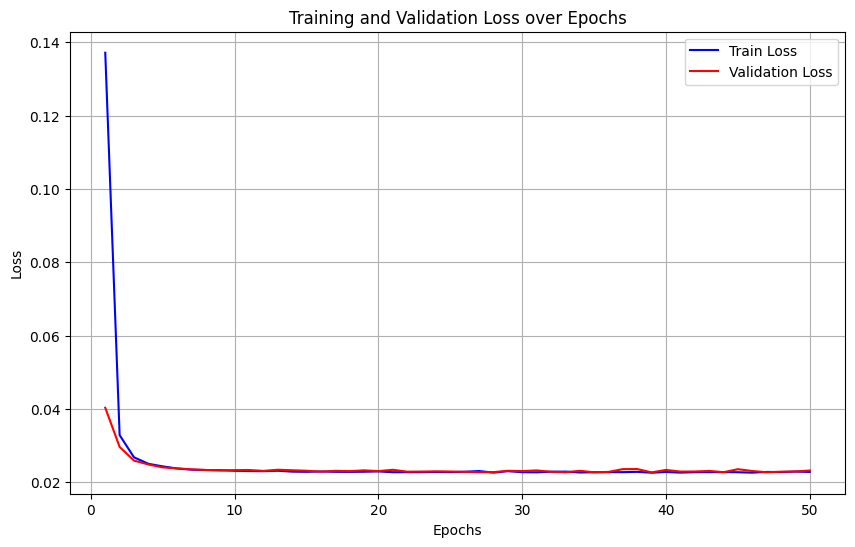

In [37]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming you already have a trained model and training/validation data loaders
# Example model, optimizer, and loss function
model = nn.Sequential(
    nn.Linear(16, 50),
    nn.ReLU(),
    nn.Linear(50, 1)
)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Example function to simulate how loss values are recorded for each epoch
def loss_epochs(train_loader, val_loader, model, criterion, optimizer, num_epochs):
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

        avg_train_loss = running_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        # Validation step
        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                running_val_loss += loss.item()
        
        avg_val_loss = running_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        
        print(f"Epoch {epoch+1}/{num_epochs} => Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    
    return train_losses, val_losses

# Assuming you have training and validation data loaders:
train_dataset = MyDataset(X_train, y_train)
val_dataset = MyDataset(X_val, y_val)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)  # Fill in with your training dataset
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)    # Fill in with your validation dataset

# Set the number of epochs you want to run the training for
num_epochs = 50

# Get the loss values for training and validation
train_losses, val_losses = loss_epochs(train_loader, val_loader, model, criterion, optimizer, num_epochs)

# Plotting the training and validation loss as a function of epochs
plt.figure(figsize=(10, 6))

# Plot train loss
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss', color='blue')

# Plot validation loss
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', color='red')

# Add titles and labels
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
